In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./pool_sim_data.csv', sep=',',decimal='.')
df.head()

,turn,total_collisions,first_ball_collision,potted_ball,action,start_ball_0_x,start_ball_0_y,start_ball_8_x,start_ball_8_y,start_ball_1_x,...,start_ball_9_x,start_ball_9_y,end_ball_0_x,end_ball_0_y,end_ball_8_x,end_ball_8_y,end_ball_1_x,end_ball_1_y,end_ball_9_x,end_ball_9_y
0,1,3,0,nothing,0.0,988,491,211,468,696,...,1032,541,691.450792,522.222680,211.0,468.0,142.489274,380.117514,1032.000000,541.000000
1,0,5,1,nothing,5.0,988,491,211,468,696,...,1032,541,393.240269,140.634159,211.0,468.0,505.372281,455.040950,1037.544883,558.365473
2,0,5,1,nothing,10.0,988,491,211,468,696,...,1032,541,455.021242,190.634293,211.0,468.0,376.922695,502.663519,1046.470701,511.134285
3,0,5,1,nothing,15.0,988,491,211,468,696,...,1032,541,515.021596,234.827107,211.0,468.0,377.331730,513.847058,1065.702574,441.730841
4,1,5,1,nothing,20.0,988,491,211,468,696,...,1032,541,504.219764,160.820474,211.0,468.0,696.000000,484.000000,837.423625,110.434569


In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['potted_ball'])
print(le.classes_)
encoded_potted_balls=le.transform(df['potted_ball']) # 0 if correct_ball, 1 if nothing, 2 if wrong_ball
df['potted_ball']=encoded_potted_balls
df.head()

['correct_ball' 'nothing' 'wrong_ball']


,turn,total_collisions,first_ball_collision,potted_ball,action,start_ball_0_x,start_ball_0_y,start_ball_8_x,start_ball_8_y,start_ball_1_x,...,start_ball_9_x,start_ball_9_y,end_ball_0_x,end_ball_0_y,end_ball_8_x,end_ball_8_y,end_ball_1_x,end_ball_1_y,end_ball_9_x,end_ball_9_y
0,1,3,0,1,0.0,988,491,211,468,696,...,1032,541,691.450792,522.222680,211.0,468.0,142.489274,380.117514,1032.000000,541.000000
1,0,5,1,1,5.0,988,491,211,468,696,...,1032,541,393.240269,140.634159,211.0,468.0,505.372281,455.040950,1037.544883,558.365473
2,0,5,1,1,10.0,988,491,211,468,696,...,1032,541,455.021242,190.634293,211.0,468.0,376.922695,502.663519,1046.470701,511.134285
3,0,5,1,1,15.0,988,491,211,468,696,...,1032,541,515.021596,234.827107,211.0,468.0,377.331730,513.847058,1065.702574,441.730841
4,1,5,1,1,20.0,988,491,211,468,696,...,1032,541,504.219764,160.820474,211.0,468.0,696.000000,484.000000,837.423625,110.434569


In [4]:
x = df[[col for col in ['turn', 'total_collisions', 'first_ball_collision', 'potted_ball',
       'start_ball_0_x', 'start_ball_0_y', 'start_ball_8_x',
       'start_ball_8_y', 'start_ball_1_x', 'start_ball_1_y', 'start_ball_9_x',
       'start_ball_9_y']]]
y = df[['action']]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=df['potted_ball'])
_, counts_train = np.unique(x_train['potted_ball']==0, return_counts=True)
_, counts_test = np.unique(x_test['potted_ball']==0, return_counts=True)
print(counts_train, counts_test)

[118650    314] [29663    79]


# Linear regressor

In [6]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

10840.703731234966 0.0004030568459552075


Text(0.5, 1.0, 'actual vs predicted')

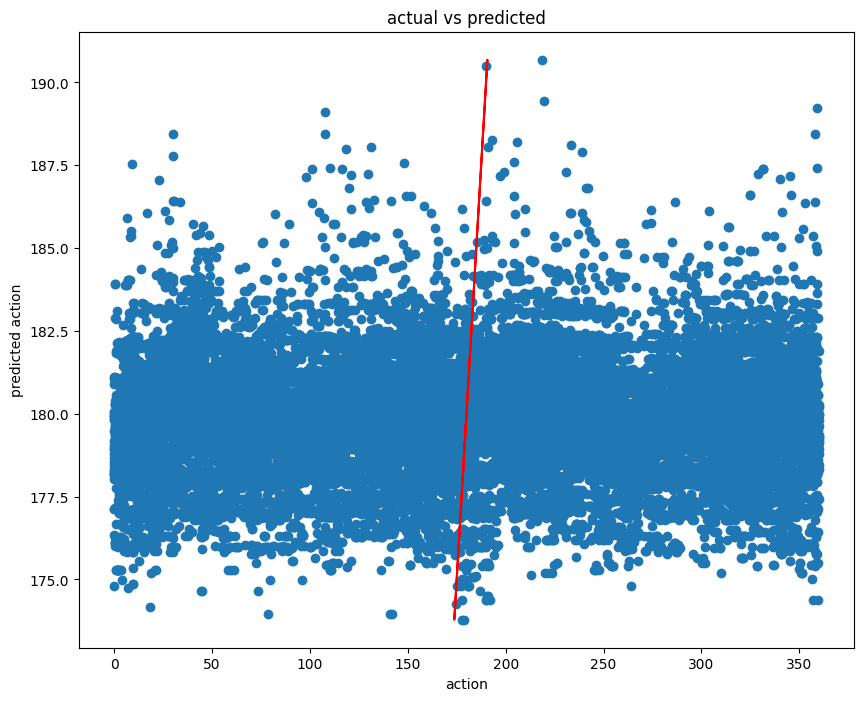

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# polynomic regressor

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

In [10]:
model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

102.8402105656682 0.024800751114409603


Text(0.5, 1.0, 'actual vs predicted')

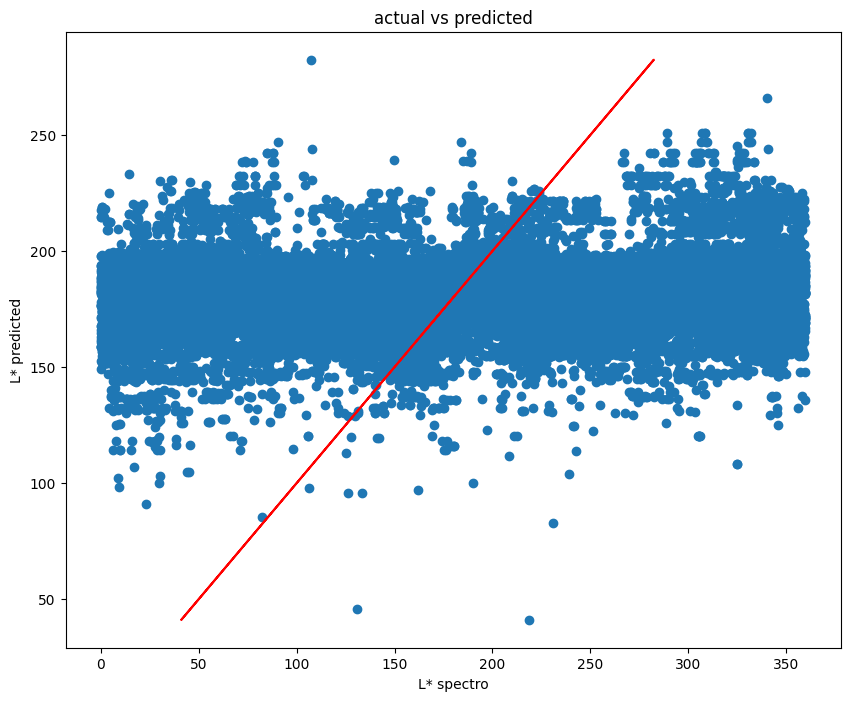

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# DecisionTreeRegressor

In [13]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

9888.916282430388 0.08816523981348656


Text(0.5, 1.0, 'actual vs predicted')

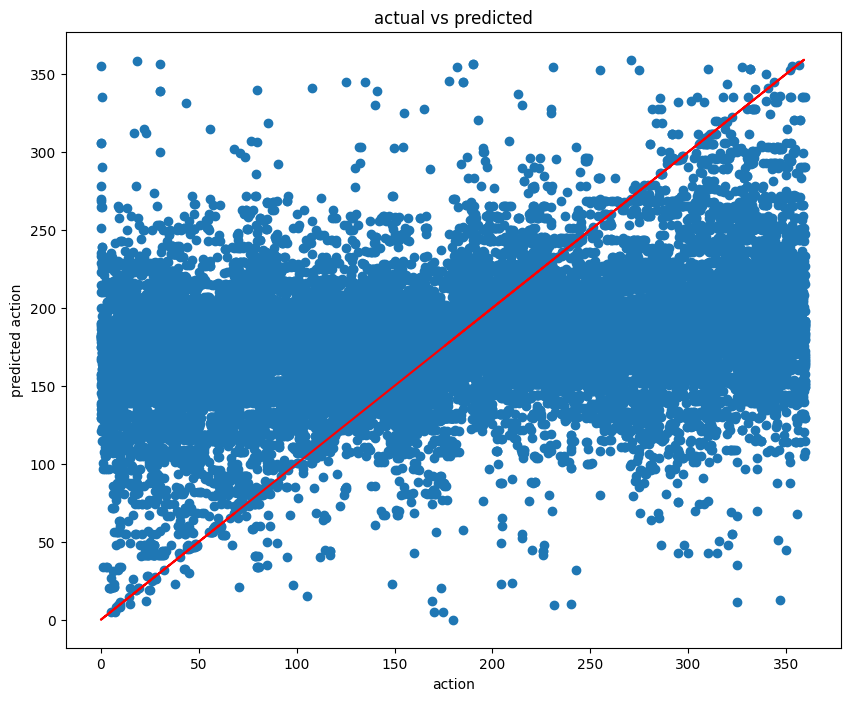

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('action')
plt.ylabel('predicted action')
plt.title('actual vs predicted')

# Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, subsample=1)
model.fit(x_train,y_train.values.ravel())

GradientBoostingRegressor(n_estimators=200, subsample=1)

In [18]:
y_pred=model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

10185.108571533525 0.06085401407449431


Text(0.5, 1.0, 'actual vs predicted')

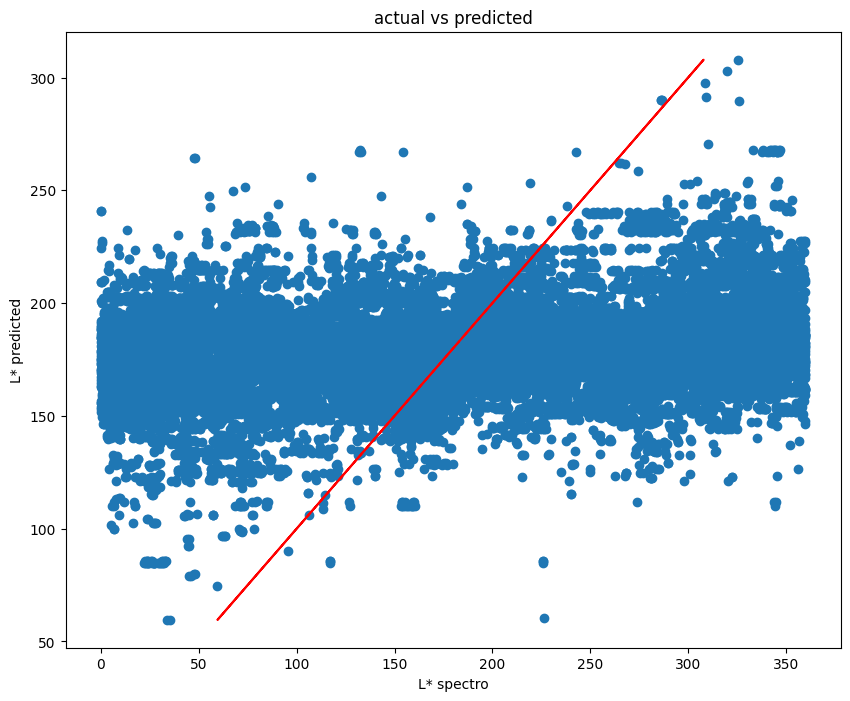

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train.values.ravel())

RandomForestRegressor()

In [22]:
y_pred=model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

9838.020828326156 0.09285819532673822


Text(0.5, 1.0, 'actual vs predicted')

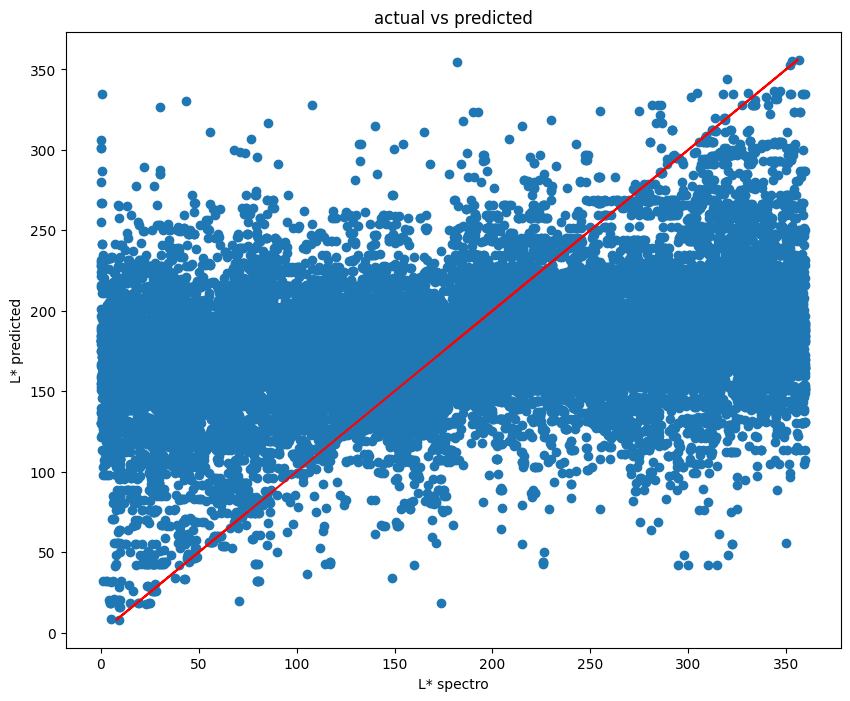

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# SVM

In [25]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train, y_train.values.ravel())

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')

# KRR

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=1.0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=True),r2_score(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('L* spectro')
plt.ylabel('L* predicted')
plt.title('actual vs predicted')